In [1]:
#please read all the below comments before running this cell
#We have completed the data collection, the files are saved in the '/Data/Real-Data' folder which we will be using for data 
## engineering purposes

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# running on Google Colab? upload the "Real_Combine.csv" file then run below code
df = pd.read_csv("/content/Real_Combine.csv") 

# Or (Whichever you choose, comment out the other one)

# running on local machine? run below code
#df = pd.read_csv("../Data/Real-Data/Real_Combine.csv")
df.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


Check for null values

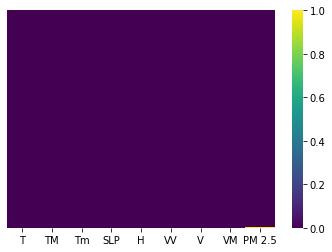

In [2]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True,cmap='viridis')
#here we see there is no null values

In [3]:
#there were two null values, which I have removed from the dataset. there were 1090 attributes, not there is 1088
df = df.dropna()

In [4]:
df.shape

(1088, 9)

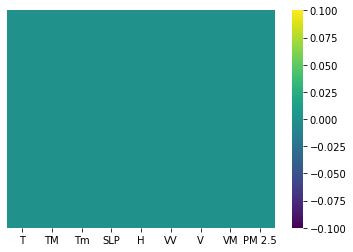

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True,cmap='viridis')
#cbar will give you the density indicator if its 'True'
#The indicator is at 0.00, no null values now.

initiating objects with independent and dependent features

In [6]:
X = df.iloc[:, :-1] #independent features
y = df.iloc[:, -1] #dependent features

The sns.pairplot will show you how are the features correlated with other features. 

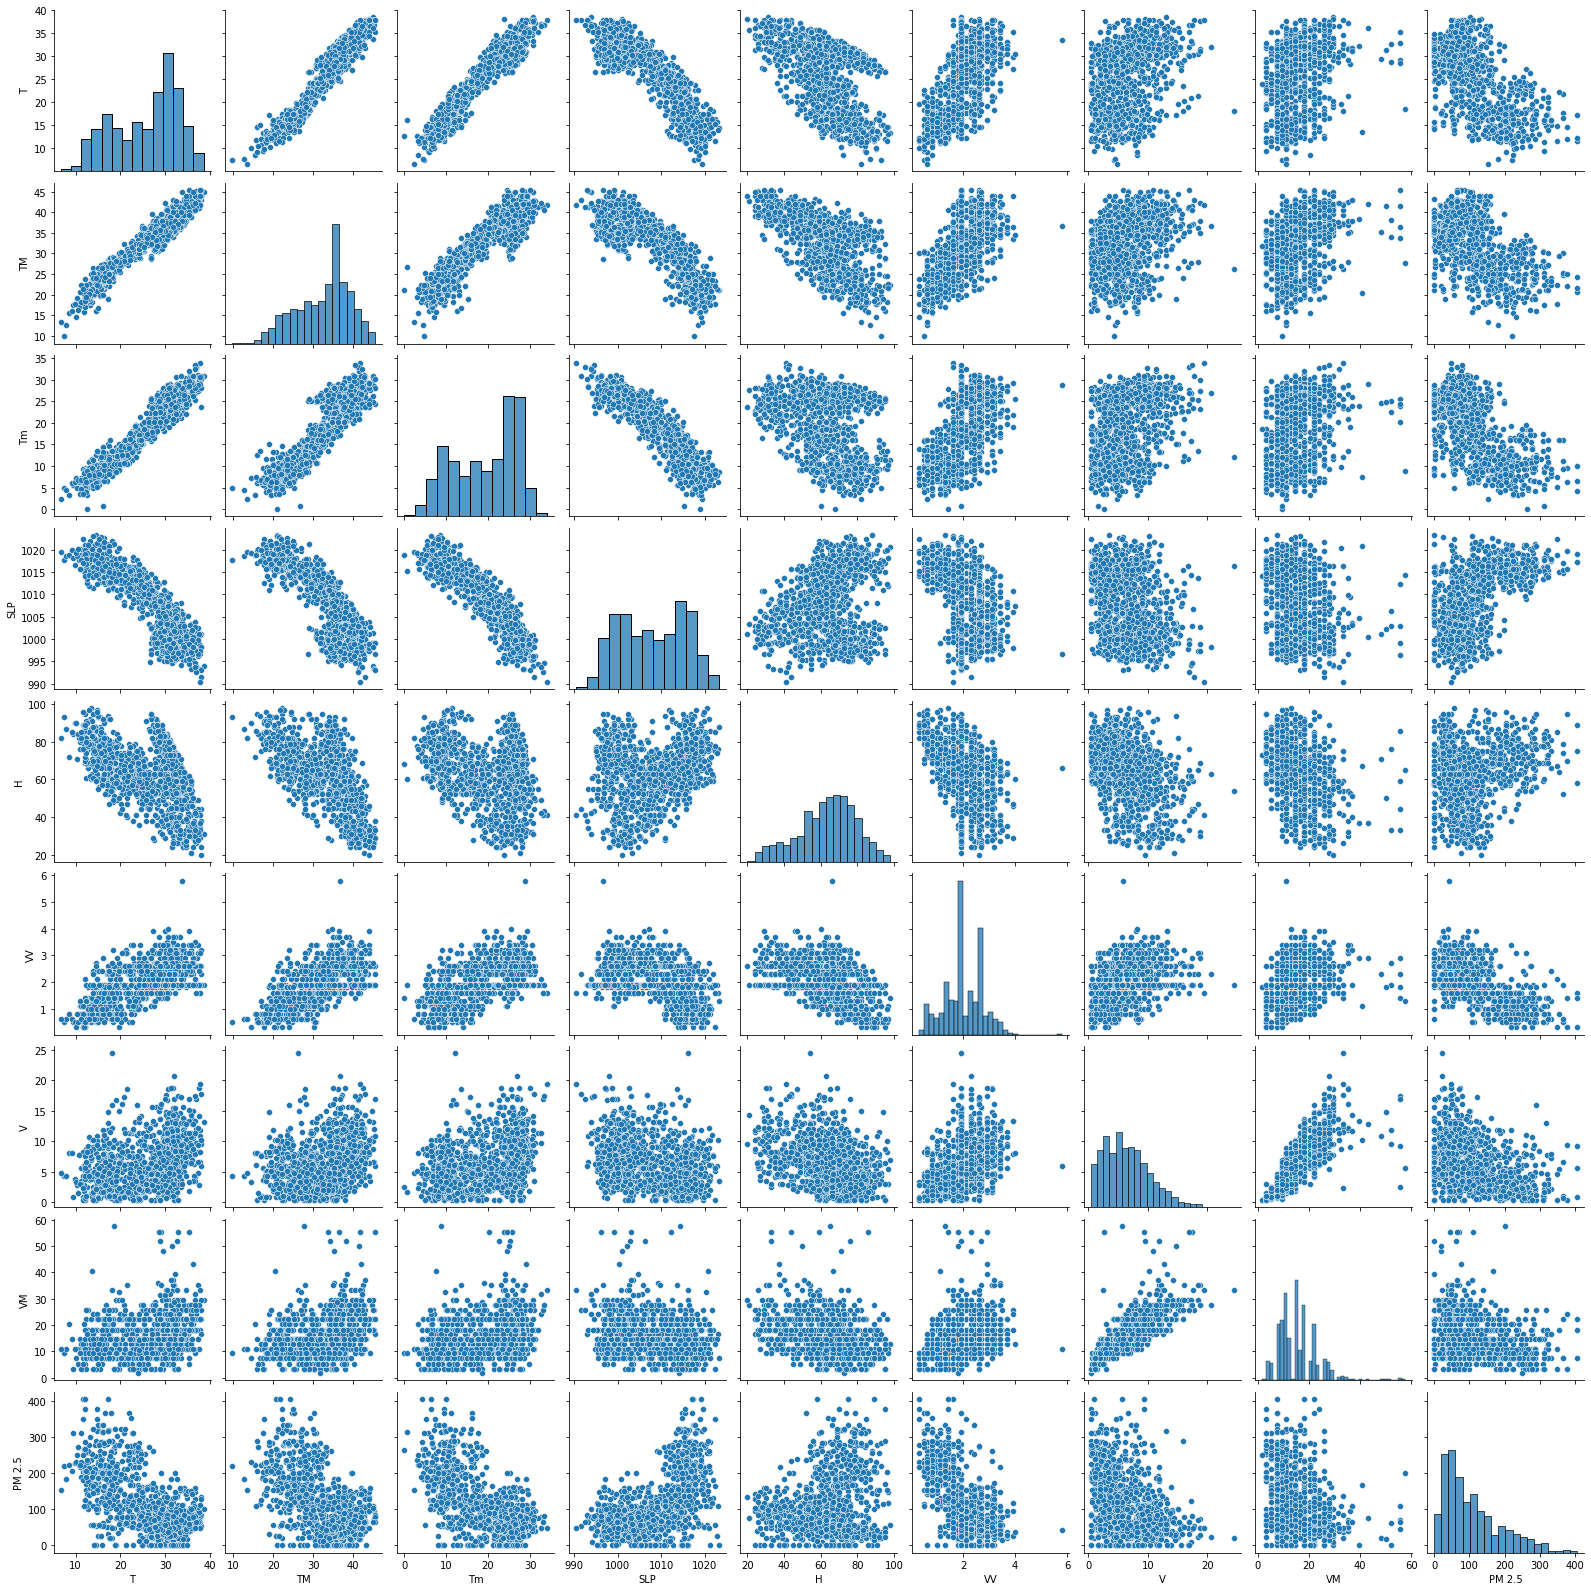

In [7]:
sns.pairplot(df)

In [8]:
df.corr() # this is the same data like the sns.pairplot.

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963416,0.957227,-0.883207,-0.488919,0.625547,0.320218,0.276548,-0.629693
TM,0.963416,1.000000,0.889979,-0.826008,-0.576799,0.598727,0.303218,0.285671,-0.565459
Tm,0.957227,0.889979,1.000000,-0.912333,-0.275047,0.547490,0.312165,0.244408,-0.661733
SLP,-0.883207,-0.826008,-0.912333,1.000000,0.231971,-0.483494,-0.325862,-0.269129,0.605637
H,-0.488919,-0.576799,-0.275047,0.231971,1.000000,-0.489597,-0.356241,-0.368694,0.166577
VV,0.625547,0.598727,0.547490,-0.483494,-0.489597,1.000000,0.369851,0.325963,-0.593327
V,0.320218,0.303218,0.312165,-0.325862,-0.356241,0.369851,1.000000,0.780952,-0.327917
VM,0.276548,0.285671,0.244408,-0.269129,-0.368694,0.325963,0.780952,1.000000,-0.262848
PM 2.5,-0.629693,-0.565459,-0.661733,0.605637,0.166577,-0.593327,-0.327917,-0.262848,1.000000


Lets use the heatmap with correlation. Correlation states how the dfeatures are related to each other or the target variable
Correlation can be + (increase in one feature, increases the target feature)or - (opp)
Heatmap will help you to find which feature is most related to the target variable. 

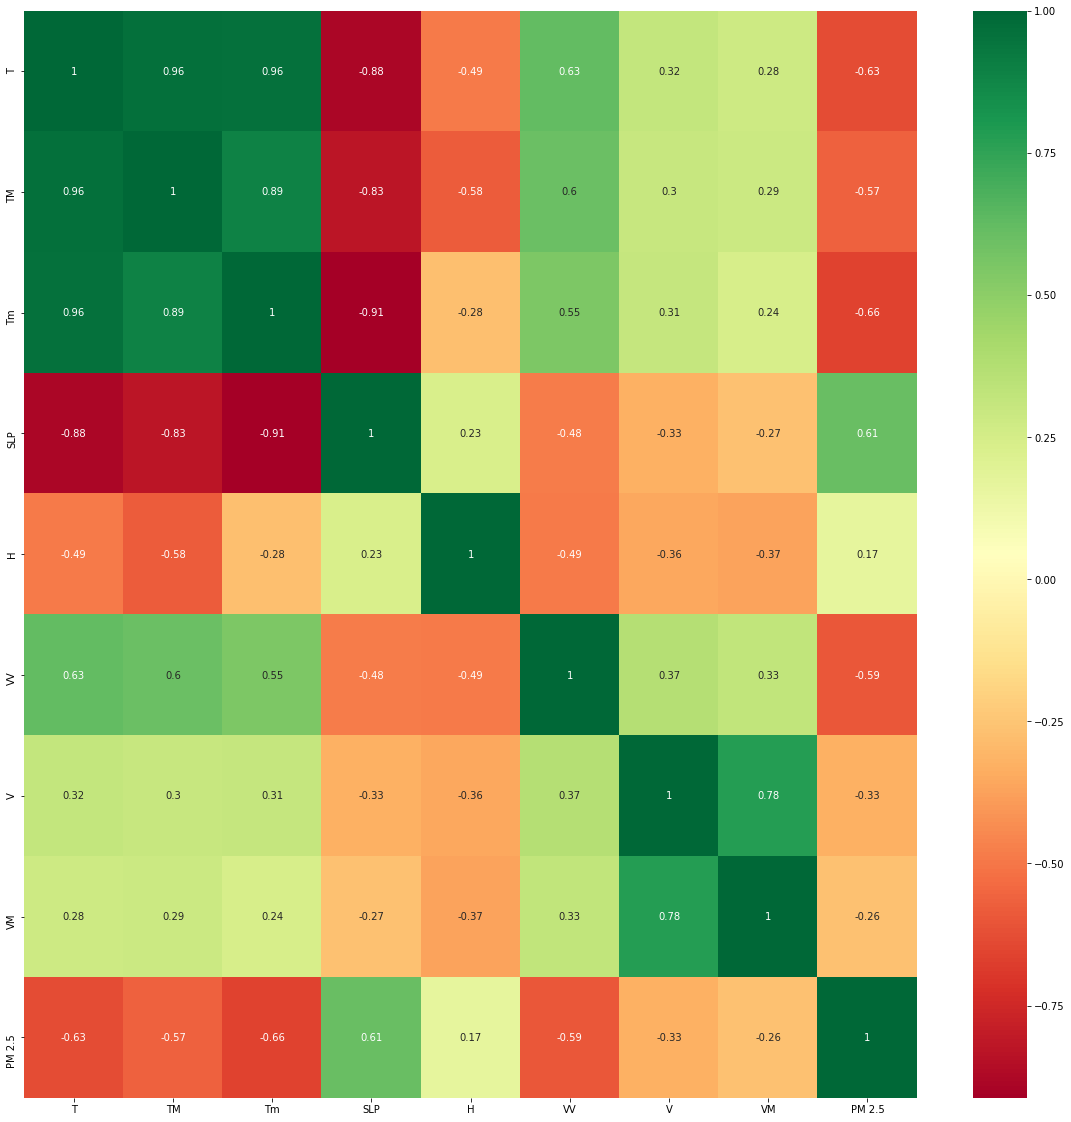

In [9]:
corrmat = df.corr() #Get correlations of each features in a dataset
top_cor_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_cor_features].corr(),annot=True, cmap="RdYlGn") #plt heat map

Information only:

Feature Importance

I will implement one regressor that will tell me the importance of a feature from the independent features on the target variable.
The extra tree regressor will score each feature on its importance to the target variable 

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y) # X are independent and y is target

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [11]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [12]:
print(model.feature_importances_)

[0.15427921 0.0981636  0.20845846 0.15460645 0.07821954 0.20213046
 0.05935947 0.04478281]


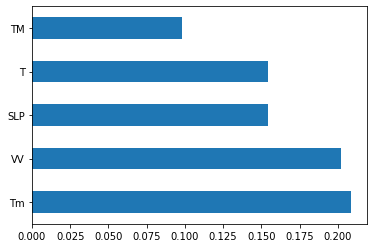

In [13]:
#how does the data look when the above data is plotted
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()


Linear Regression

LR aim is to create a best fit line.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


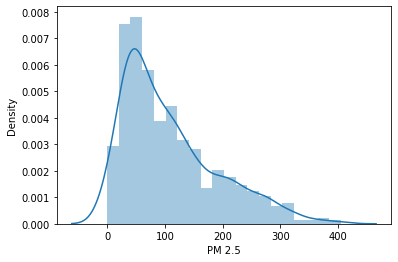

In [14]:
sns.distplot(y) #right skewed

Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #70:30

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [19]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [20]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.0740030345207896


In [21]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [22]:
score.mean()

-0.0925614653378894

In [23]:
prediction=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


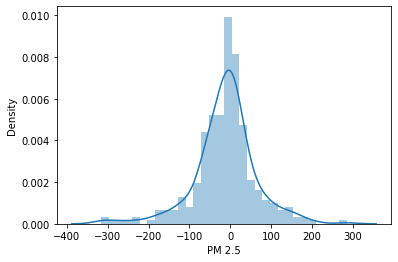

In [24]:
sns.distplot(y_test-prediction)

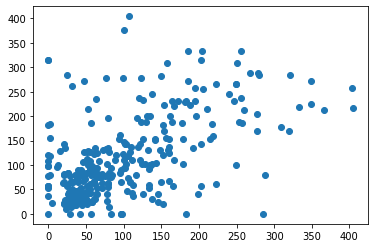

In [25]:
plt.scatter(y_test,prediction)

HyperparameterTuning

In [26]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

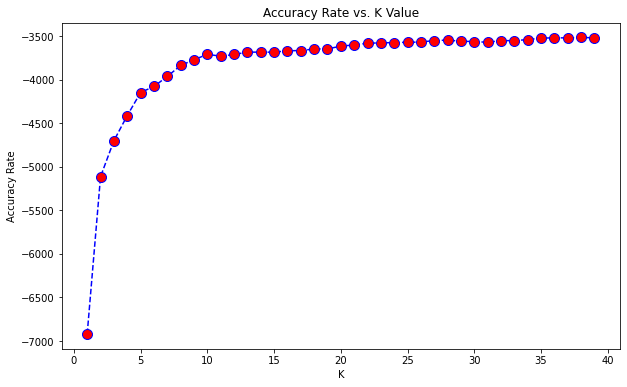

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [28]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


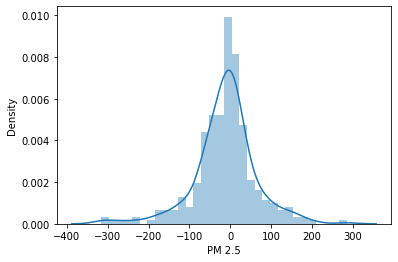

In [29]:
sns.distplot(y_test-predictions)

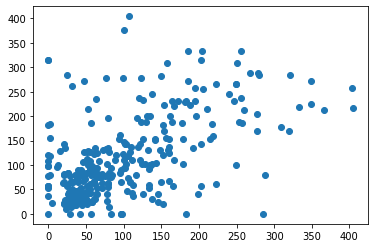

In [30]:
plt.scatter(y_test,predictions)

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 52.14402395514781
MSE: 5977.1078487618925
RMSE: 77.31175750661663


In [32]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


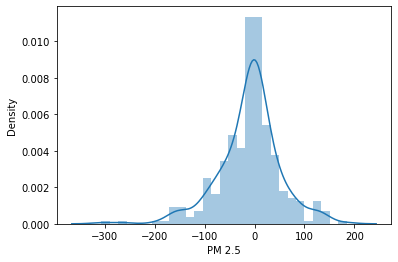

In [33]:
sns.distplot(y_test-predictions)

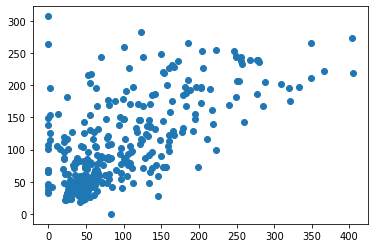

In [34]:
plt.scatter(y_test,predictions)

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 43.479085966700644
MSE: 3992.980774023578
RMSE: 63.19003698387569


In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 52.14402395514781
MSE: 5977.1078487618925
RMSE: 77.31175750661663


FYI: Conerting into a pickle file. Converting to pickle file will help me predict while deploying the modal. 
pickle is like a blackbox, where you give the input and you get the output. it is a file format. You cant read the file. 


In [37]:
#please read all the below comments before running this cell
import pickle
#create a file in your local machine where you want to store this files data
#file = open('../pickle-files/linear_regression_modal.pkl','wb')

#If you want to save the file in the google colab, run the below line
file = open('KNearestNeighborRegressor.pkl','wb')

# dump information
pickle.dump(regressor, file)